In [15]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib notebook

In [12]:
def sine(f0, fs, length, amp=1, phase=0):
    time = np.arange(length)/fs
    return amp*np.sin(2*np.pi*f0*time+phase)

In [13]:
def harmonic(f0, fs, length, harmonic_number=10):
    h = sine(amp=1, f0=f0, fs=fs, length=length)
    for i in range(2, harmonic_number+1):
        s = sine(amp=1, f0=f0*i, fs=fs, length=length)
        h = h + s
    return h

<IPython.core.display.Javascript object>


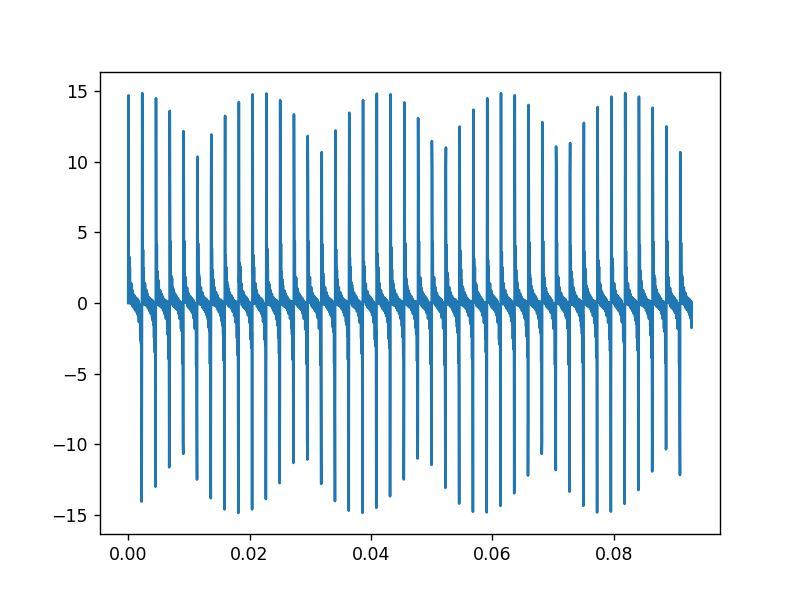

In [17]:
f0 = 440
fs = 22050
length = 2048
h_s = harmonic(f0=f0, fs=fs, length=length, harmonic_number=20)
time = np.arange(length)/fs
fig, ax = plt.subplots()
ax.plot(time, h_s)

In [19]:
from scipy import signal
from scipy import fftpack

<IPython.core.display.Javascript object>


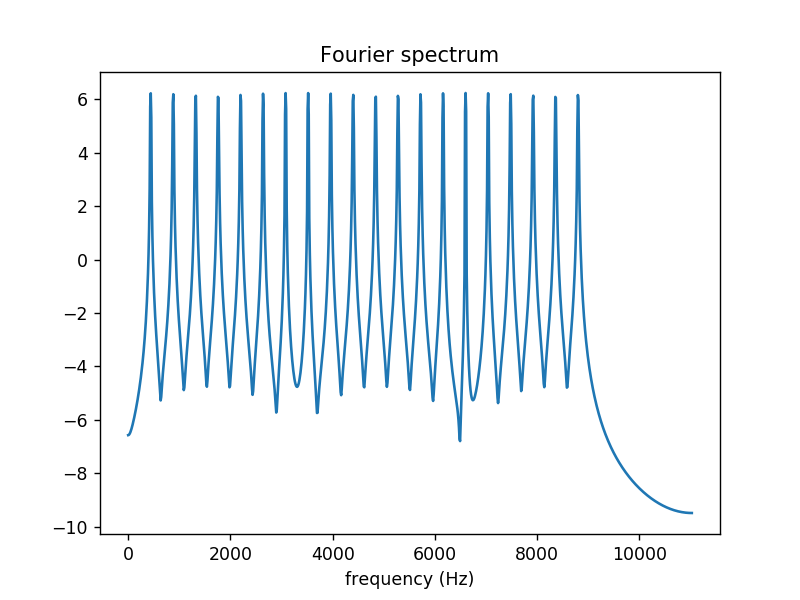

Text(0.5, 1.0, 'Fourier spectrum')

In [22]:
windowed_hs = signal.get_window("hann", 2048) * h_s
Xk = np.fft.rfft(windowed_hs)
freq_vector = np.fft.rfftfreq(2048, d=1/fs)

log_X = np.log(np.abs(Xk))

fig, ax = plt.subplots()
ax.plot(freq_vector, log_X)
ax.set_xlabel('frequency (Hz)')
ax.set_title('Fourier spectrum')

<IPython.core.display.Javascript object>


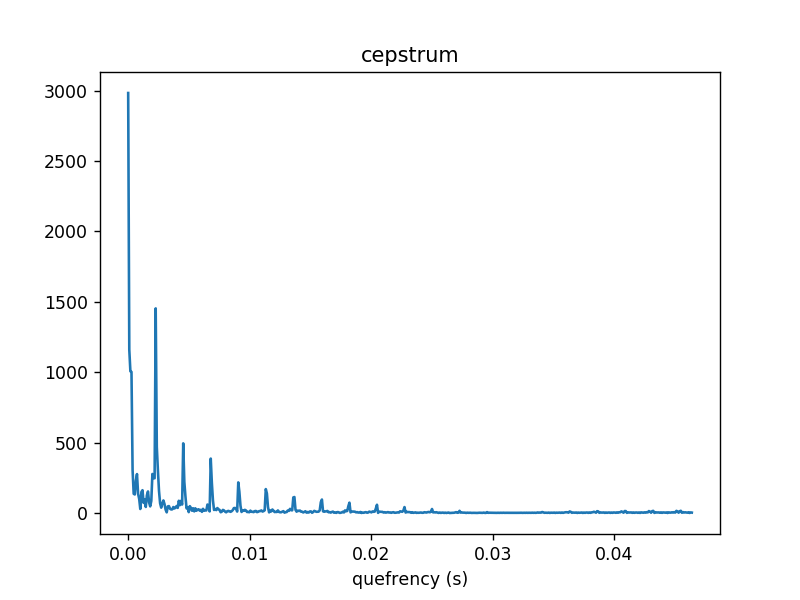

Text(0.5, 1.0, 'cepstrum')

In [23]:
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)

fig, ax = plt.subplots()
ax.plot(quefrency_vector, np.abs(cepstrum))
ax.set_xlabel('quefrency (s)')
ax.set_title('cepstrum')